# Exploración de pingüinos árticos con agrupación K-means

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

Origen de estos datos: Los datos fueron recopilados y puestos a disposición por la Dra. Kristen Gorman y la Estación Palmer, Antártida LTER, miembro de la Red de Investigación Ecológica a Largo Plazo.

**La base de datos:**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Desafortunadamente no se ha podido registrar las especies de pingüinos, pero se sabe que hay tres especies que son nativas de la región: **Adelia**, **Barbijo** y **Papúa**, la tarea es aplicar sus habilidades en ciencia de datos para identificar grupos en el conjunto de datos


In [471]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
penguins_clean = penguins_df.dropna()

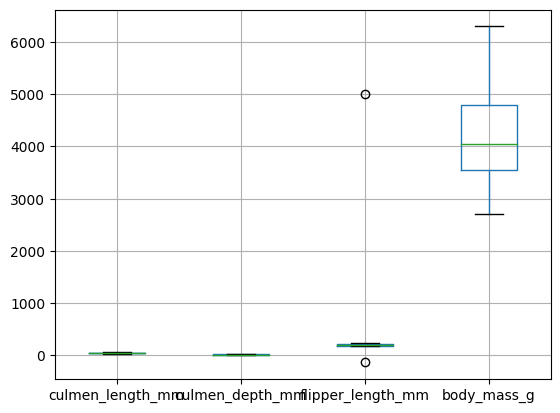

In [472]:
penguins_clean.boxplot()
plt.show()

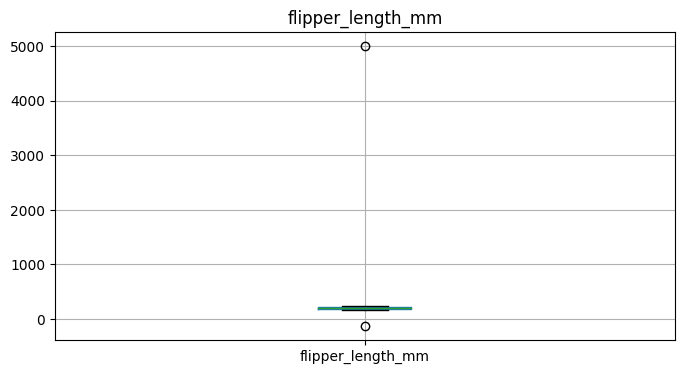

In [473]:
import matplotlib.pyplot as plt

# Columnas numéricas para revisar valores atípicos
num_columns = ['flipper_length_mm']

# Visualizar los boxplots para estas columnas
for column in num_columns:
    plt.figure(figsize=(8, 4))
    penguins_clean.boxplot([column])
    plt.title(column)
    plt.show()

In [474]:
penguins_clean[penguins_clean['flipper_length_mm']>4000]
penguins_clean[penguins_clean['flipper_length_mm']<0]
penguins_clean = penguins_clean.drop([9,14])

### Preprocesamiento de los datos limpios utilizando el escalado estándar y la codificación one-hot para agregar variables ficticias:

#### Crear las variables ficticias y eliminar la característica categórica original del conjunto de datos.

In [475]:
# Crear variables ficticias para la columna 'sex' y eliminar la original
penguins_with_dummies = pd.get_dummies(penguins_clean).drop('sex_.',axis=1)

#### Escalar los datos utilizando el método de escala estándar

In [476]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(penguins_with_dummies)
penguins_preprocessed = pd.DataFrame(data=X,columns=penguins_with_dummies.columns)

#### Guardar los datos actualizados como un nuevo DataFrame llamado penguins_preprocessed

In [477]:
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,1.009050,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,-0.991031,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,1.009050,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,-0.991031,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,1.009050,-1.003008


### Realizar un Análisis de componentes principales (PCA) en el conjunto de datos preprocesados para determinar la cantidad deseada de componentes, considerando cualquier componente con una relación de varianza explicada superior al 10% como un componente adecuado. Se guarda el número de componentes como una variable llamada n_components.


Se ejecuta PCA usando n_components y se almacena el resultado como penguins_PCA.


In [478]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

pca = PCA(n_components=None)
penguins_pca = pca.fit(penguins_preprocessed)
var_ratio = penguins_pca.explained_variance_ratio_
n_components=sum(penguins_pca.explained_variance_ratio_>0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)
penguins_PCA.shape

(333, 2)

In [479]:
print("Number of components used:", n_components)
print("Explained variance ratios of components:", var_ratio)
print("Data after PCA:\n", penguins_PCA[:5])

Number of components used: 2
Explained variance ratios of components: [0.51973484 0.34424041 0.08591863 0.03225427 0.01686049 0.00099136]
Data after PCA:
 [[-0.72952069 -2.09719199]
 [-1.9293044   0.4121497 ]
 [-1.95352479  0.3084854 ]
 [-2.28817761 -0.15827773]
 [-0.62182165 -2.51402049]]


### Se usa la agrupación de k-means en el conjunto de datos penguins_PCA, configurando random_state=42, para determinar el número de agrupaciones mediante el análisis del codo. La cantidad óptima de clústeres se guarda en una variable llamada n_cluster.


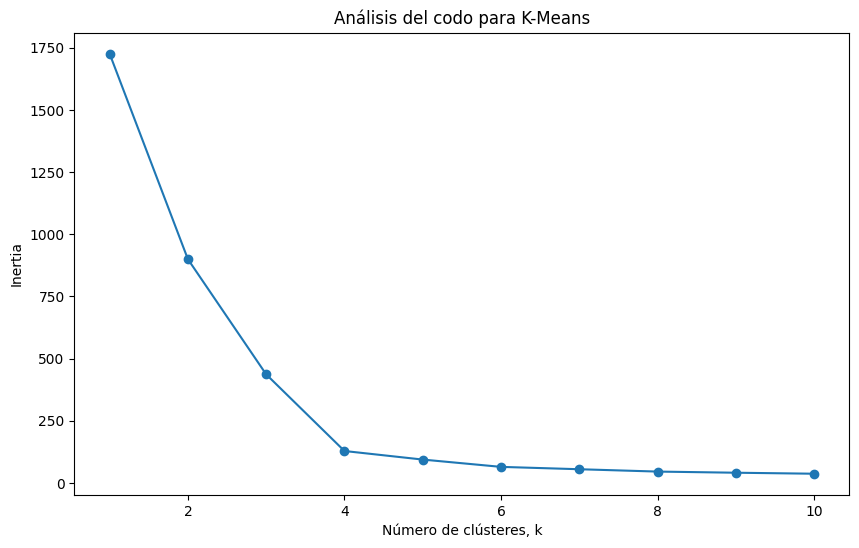

In [480]:
# Clustering K-Means
# Ejecutar un análisis de codo para determinar el número óptimo de clústeres
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(penguins_PCA)
    inertias.append(kmeans.inertia_)

# Determinar el punto de "codo" usando el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, '-o')
plt.xlabel('Número de clústeres, k')
plt.ylabel('Inertia')
plt.title('Análisis del codo para K-Means')
plt.show()

In [481]:
n_clusters = 4   # Este valor puede ajustarse según la observación del gráfico del codo

### Se crea y ajusta un nuevo modelo de clúster de k-medias, estableciendo n_cluster igual a su variable n_cluster y guardando el modelo como una variable llamada kmeans.

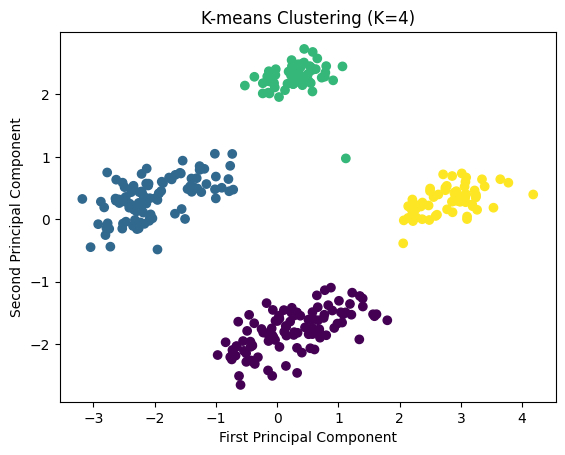

In [482]:

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

### Se agrega la columna de etiqueta extraída de la agrupación k-means (usando kmeans.labels_) al marco de datos penguins_clean.

In [483]:
penguins_clean['label'] = kmeans.labels_

### Se crea una tabla estadística agrupando penguins_clean según la columna "etiqueta" y calculando la media de cada columna numérica, esta tabla se guarda como stat_penguins.

In [484]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']

stat_penguins = penguins_clean.groupby('label')[numeric_columns].mean()
stat_penguins


,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,45.545763,14.262712,212.779661
3,49.473770,15.718033,221.540984
